In [23]:
import pandas as pd
import io
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os

In [33]:
df = pd.read_csv("tmdb-movies.csv")

In [25]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [ ]:
# 0. Найдите вашего любимого актера, режиссера, фильм и жанр.
# Том Кукуруз - Tom Cruise, Кристофер Нолан - Christopher Nolan,
# Парк Юрского Периода - Jurrasic Park, комедии - Comedy
# В вопросах у которых стоит значок ❤︎ нужно дополнительно использовать вашего любимого актера, фильм и т.п.

In [30]:
print(df[df['original_title'] == 'Thor']['cast'])
print(df[df['original_title'] == 'Thor']['director'])
print(df[df['original_title'] == 'Thor']['genres'])

3377    Chris Hemsworth|Natalie Portman|Tom Hiddleston...
Name: cast, dtype: object
3377    Kenneth Branagh
Name: director, dtype: object
3377    Adventure|Fantasy|Action
Name: genres, dtype: object


In [ ]:
# ❤︎ Фильм - Thor
# ❤︎ Актер - Tom Hiddleston
# ❤︎ Режиссер - Kenneth Branagh
# ❤︎ Жанр - Fantasy

In [ ]:
# 1. Какой фильм имеет больше всего оценок? (❤︎)

In [41]:
df1 = df.groupby('vote_count')[['original_title']].max()
print(df1)

              original_title
vote_count                  
10            í˜•ì‚¬ Duelist
11             ì•„ê¸°ì™€ ë‚˜
12            ìž‘ì—…ì˜ ì •ì„
13                  ìºì¹˜ë¯¸
14           Zombie Massacre
...                      ...
7375        Django Unchained
8432         The Dark Knight
8458                  Avatar
8903            The Avengers
9767               Inception

[1289 rows x 1 columns]


In [42]:
print(df[df['original_title'] == 'Thor']['vote_count'])

3377    4485
Name: vote_count, dtype: int64


In [ ]:
# 2. Какой фильм, а также какого жанра и года выпуска, имеет самые высокие оценки? (❤︎)

In [51]:
max_rate = df['vote_average'].max()
print(df[df['vote_average'] == max_rate]['original_title'])

3894    The Story of Film: An Odyssey
Name: original_title, dtype: object


In [52]:
print(df[df['original_title'] == 'Thor']['vote_average'])

3377    6.5
Name: vote_average, dtype: float64


In [ ]:
# 3. Какой фильм самый короткий/длинный по продолжительности? (❤︎)

In [58]:
max_runtime = df['runtime'].max()
print(df[df['runtime'] == max_runtime]['original_title'])

3894    The Story of Film: An Odyssey
Name: original_title, dtype: object


In [47]:
min_runtime = df['runtime'].min()
print(df[df['runtime'] == min_runtime]['original_title'])

92           Mythica: The Necromancer
334                           Ronaldo
410                    Anarchy Parlor
445     The Exorcism of Molly Hartley
486                If There Be Thorns
595                         Deep Dark
616                      The Outfield
1241                        Dance-Off
1289                        Treehouse
1293                         Tim Maia
1849                     Spectacular!
2315             Listen to Your Heart
2370                  Freshman Father
3329         Grande, grosso e Verdone
3794             Toi, moi, les autres
3857                         Cell 213
3884                           eCupid
4063           Madea's Family Reunion
4138               A Time for Dancing
4829                             Rags
4944              How to Fall in Love
5216            Madea's Class Reunion
5695                 Skinwalker Ranch
5920           The Food Guide to Love
5938                      Go Goa Gone
5992                 Amiche da morire
6040        

In [53]:
print(df[df['original_title'] == 'Thor']['runtime'])

3377    115
Name: runtime, dtype: int64


In [ ]:
# 4. Сколько всего киностудий (product_companies)?

In [55]:
print(df['production_companies'].nunique())

7445


In [ ]:
# 5. Какое количество фильмов сняла каждая из киностудий?

In [ ]:
# 6. Сколько фильмов было снято одной киностудией, двумя, тремя и т.д.?

In [65]:
df["production_companies"].str.split("|", expand=True).count(axis=1).value_counts()

1    3440
2    2580
3    1763
5    1126
0    1030
4     927
dtype: int64

In [ ]:
# 7. Какая средняя оценка у фильмов с вашим любимым актером?

In [62]:
vote_av = np.isin(df["cast"].str.split("|", expand=True).to_numpy(), "Tom Hiddleston")
df.iloc[vote_av]["vote_average"].mean()

6.311111111111111

In [ ]:
# 7.1. Найдите актера, который снимался чаще всего и ответьте на вопрос в каких жанрах? (❤︎)

In [ ]:
# 8. Сборы какой кинокомпании самые высокие за последние 5 лет (с 2010 по 2015)?

In [56]:
small_df = df[['production_companies', 'release_year', 'budget_adj']]
result = small_df[(small_df['release_year'] >= 2010) & (small_df['release_year'] <= 2015)]
max_b = small_df['budget_adj'].max()
print(small_df[small_df['budget_adj'] == max_b]['production_companies'])

2244    Boram Entertainment Inc.
Name: production_companies, dtype: object


In [ ]:
# 9. Топ-10 режиссеров и актеров с самым высоким в среднем рейтингом фильмов?

In [ ]:
# 10. Фильмы в каком жанре в среднем имеют самые высокие оценки? (❤︎)

woman director                                        134
independent film                                       82
sport                                                  25
musical                                                24
duringcreditsstinger                                   24
                                                     ... 
moon|florida|nasa|spaceman|race against time            1
vampire|dracula|satanist|hammer horror|van helsing      1
europe|iceland|escape|disaster film|volcanic ash        1
psychic power|salesman                                  1
police|high school|undercover cop                       1
Name: keywords, Length: 8804, dtype: int64

In [ ]:
# 11. Топ-10 ключевых слов (keywords)?

In [72]:
k = df['keywords'].str.split("|", expand=True).dropna().to_numpy().ravel()
pd.Series(k).value_counts().head(10)

sex                 258
based on novel      243
independent film    175
murder              157
nudity              150
female nudity       142
new york            132
prison              111
london              107
sport               103
dtype: int64

In [ ]:
# 12. Растет ли бюджет фильмов с каждым годом? (постройте график)

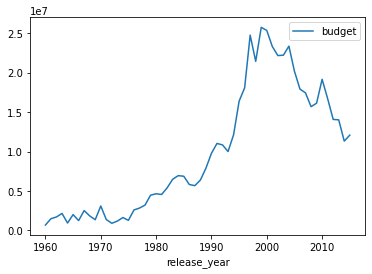

In [60]:
df.groupby('release_year')[['budget']].mean().plot()

По графику видно, что бюджет фильмов рос до 2000 года, дальше начал падать

In [ ]:
# 13. Что больше всего влияет на доходы фильмов?

In [ ]:
# 14. Топ-5 самых прибильных и убыточных фильмов (по соотношению бюджета к доходам)

In [ ]:
# 15. Как изменялось количество снимаемых фильмов в жанре "Drama" с течением времени? (Постройте график) ❤︎

In [ ]:
# 16. Топ-10 актеров, которые снялись в наибольшем количестве фильмов

In [ ]:
# 17. Средний рейтинг фильмов по годам (постройте график)

In [ ]:
# 18. Постройте график распределения жанров (столько-то процентов это боевики, столько-то комедии и т.п.)

In [ ]:
# 19. Какой режиссер чаще всего снимал одного и того же актера?

In [ ]:
# 20. Какая пара жанров чаще всего встречается вместе?

In [ ]:
# 21. Топ-10 ключевых слов с самым высоким рейтингом/бюджетом/доходами фильмов (слово - срейдний рейтинг/бюджет/доходы)

In [ ]:
# 22. Постройте и визуализируйте граф связей между актерами (как это было в работе АПИ ВК).